#About Dataset
Extraction was done by Barry Becker from the 1994 Census database.
Prediction task is to determine whether a person makes over 50K a year.

#Columns are:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.
hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: <=50K or >50K

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import RobustScaler
import plotly.express as px

# Data Preprocessing

In [2]:
# Reading data 
df = pd.read_csv("../input/salary-prediction-classification/salary.csv", na_values=[' ?' ])


In [3]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [5]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#rows and columns 
df.shape

(32561, 15)

In [7]:
# check data type of each coulmn
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Number of uniques values in dataframe

pd.DataFrame({'': df.nunique().index , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,age,73
1,workclass,8
2,fnlwgt,21648
3,education,16
4,education-num,16
5,marital-status,7
6,occupation,14
7,relationship,6
8,race,5
9,sex,2


In [9]:
#show unique values for all columns
for col in df.columns.values:
  print(col, end="\n\n")
  print(df[col].unique(), end="\n\n ***********************************\n\n")

age

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

 ***********************************

workclass

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']

 ***********************************

fnlwgt

[ 77516  83311 215646 ...  34066  84661 257302]

 ***********************************

education

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

 ***********************************

education-num

[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

 ***********************************

marital-status

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-

In [10]:
#Removing spaces from objects data types
df.loc[: , df.dtypes == np.object].apply(lambda e : e.unique())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


workclass         [ State-gov,  Self-emp-not-inc,  Private,  Fed...
education         [ Bachelors,  HS-grad,  11th,  Masters,  9th, ...
marital-status    [ Never-married,  Married-civ-spouse,  Divorce...
occupation        [ Adm-clerical,  Exec-managerial,  Handlers-cl...
relationship      [ Not-in-family,  Husband,  Wife,  Own-child, ...
race              [ White,  Black,  Asian-Pac-Islander,  Amer-In...
sex                                                [ Male,  Female]
native-country    [ United-States,  Cuba,  Jamaica,  India, nan,...
salary                                              [ <=50K,  >50K]
dtype: object

In [11]:
for col in df.loc[: , df.dtypes == np.object].columns:
    df[col] = df[col].str.strip()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [12]:
df.salary.unique()

array(['<=50K', '>50K'], dtype=object)

In [13]:
#some statistical information about data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [14]:
# show first 5 rows 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
pd.DataFrame({'h': df.nunique().index , 'null':  df.isnull().sum()})

,h,null
age,age,0
workclass,workclass,1836
fnlwgt,fnlwgt,0
education,education,0
education-num,education-num,0
marital-status,marital-status,0
occupation,occupation,1843
relationship,relationship,0
race,race,0
sex,sex,0


In [16]:
# Fill NaN values by MODE

df['workclass'].fillna(df['workclass'].mode()[0] , axis=0 ,inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0] , axis=0 ,inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0] , axis=0 ,inplace=True)

In [17]:
#check null values again
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [18]:
#check Duplicates
df.duplicated().sum()

24

In [19]:
#remove duplicate but leave one 
df.drop_duplicates(keep='first',inplace=True)
df.shape

(32537, 15)

In [20]:
#formatting the target column
df['salary']= df['salary'].map({'<=50K': 0, '>50K': 1})
df['salary'].value_counts()

0    24698
1     7839
Name: salary, dtype: int64

In [21]:
#formatting [sex] column 
df['sex']= df['sex'].map({'Female': 0, 'Male': 1})
df['sex'].value_counts()

1    21775
0    10762
Name: sex, dtype: int64

In [22]:
df['education-num'].value_counts()

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64

In [23]:
# Formating [ marital-status ] column
df['marital-status'] =  df['marital-status'].replace(['Married-civ-spouse' , 'Married-spouse-absent' , 'Married-AF-spouse' ] , 1)
df['marital-status'] =  df['marital-status'].replace(['Divorced' , 'Separated' , 'Widowed' ] , 0)
df['marital-status'] =  df['marital-status'].replace(['Never-married'] , -1)

In [24]:
df['marital-status'].value_counts()

 1    15411
-1    10667
 0     6459
Name: marital-status, dtype: int64

In [25]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,-1,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,1,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,1,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,1,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [26]:
#compare education with education num
print(df["education"].value_counts(), end="\n\n ***********************************\n\n")
print(df["education-num"].value_counts())

HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: education, dtype: int64

 ***********************************

9     10494
10     7282
13     5353
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: education-num, dtype: int64


In [27]:
'''
1) Preschool
2) 1-4
3) 5-6
4) 7-8
5) 9
6) 10
7) 11
8) 12
9) HS-grad
10) some-college
11) Assoc-voc
12) Assoc-acdm
13) Bachelors
14) Master
15) Prof-school
16) Doctrate
'''

'\n1) Preschool\n2) 1-4\n3) 5-6\n4) 7-8\n5) 9\n6) 10\n7) 11\n8) 12\n9) HS-grad\n10) some-college\n11) Assoc-voc\n12) Assoc-acdm\n13) Bachelors\n14) Master\n15) Prof-school\n16) Doctrate\n'

# EDA

In [28]:
# To put percentage numbers above chart ( With hue , Without hue)
def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

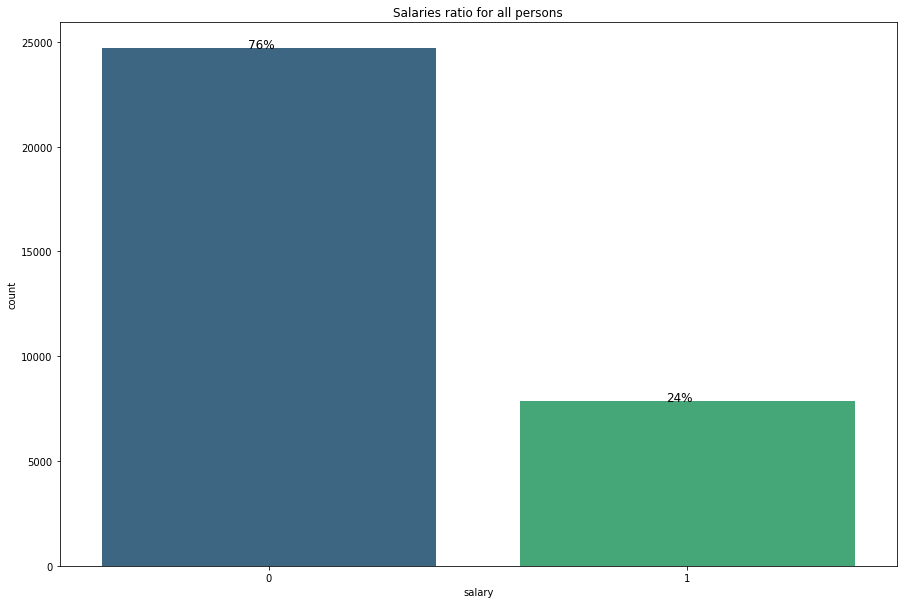

In [29]:
plt.figure(figsize=(15,10))
ax = sns.countplot( x=df.salary , data= df , palette='viridis')
ax.set_title('Salaries ratio for all persons')
percen(ax , df.salary)

Text(0.5, 1.0, 'Salaries ratio for Male/Female')

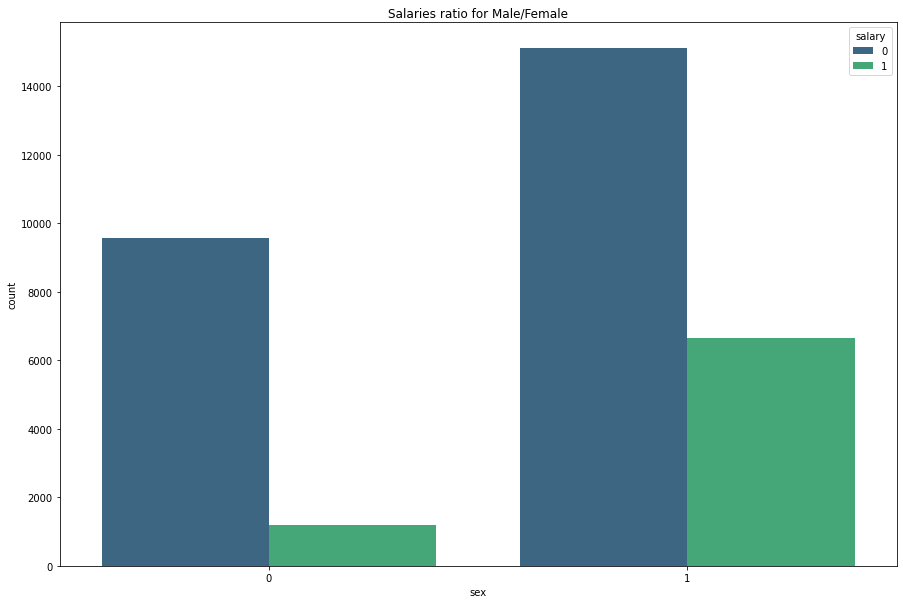

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='sex', hue='salary', palette='viridis').set_title('Salaries ratio for Male/Female')

In [31]:
df[df['sex']==1].salary.value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

0    69.0 %
1    31.0 %
Name: salary, dtype: object

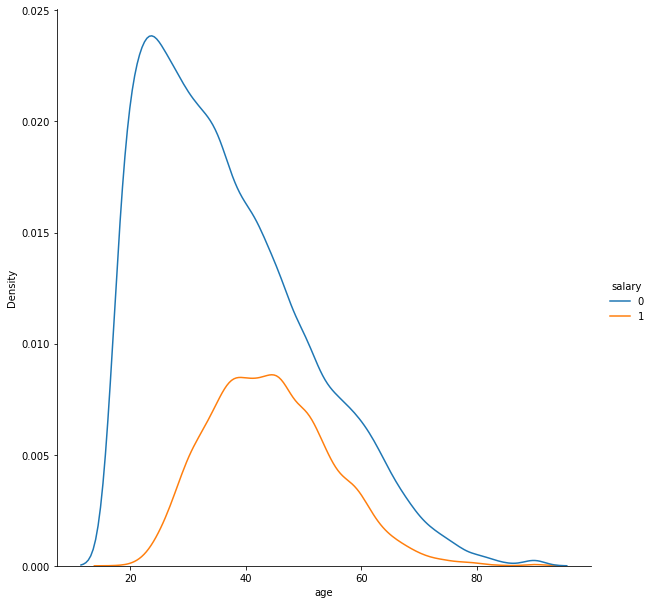

In [32]:
sns.displot(data=df, x="age", hue="salary", kind="kde", height=8.5, aspect=1)

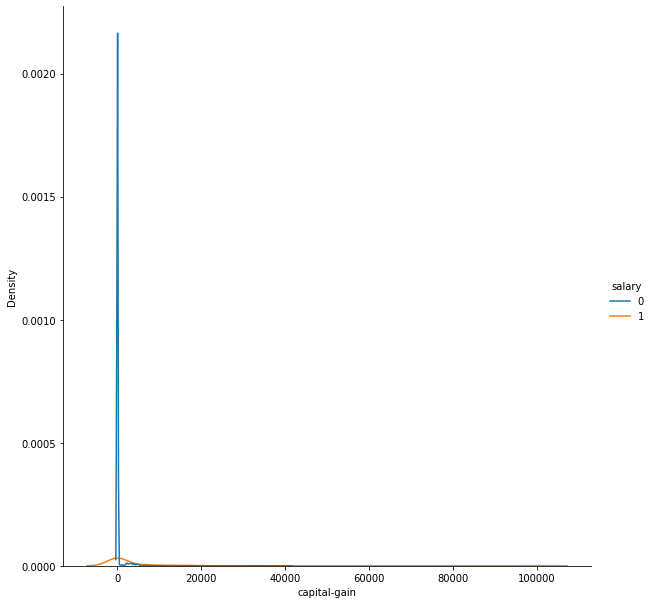

In [33]:
sns.displot(data=df, x="capital-gain", hue="salary", kind="kde", height=8.5, aspect=1)

In [34]:
df.drop('capital-gain', inplace=True, axis=1)

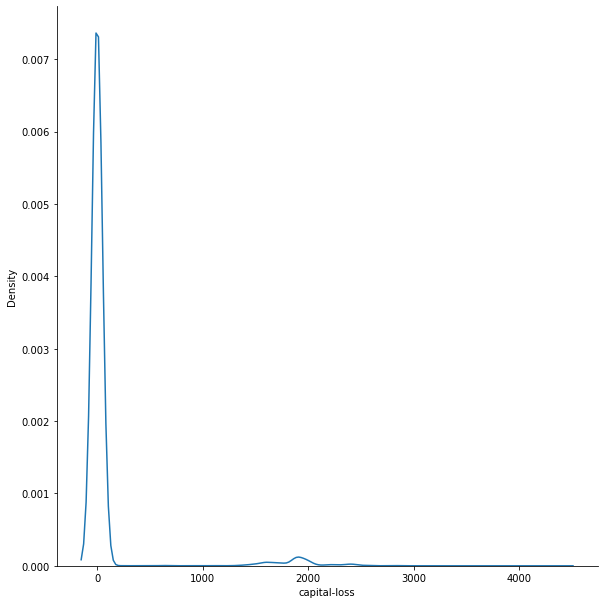

In [35]:
sns.displot(data=df, x="capital-loss", kind="kde", height=8.5, aspect=1)

In [36]:
df.drop('capital-loss', inplace=True, axis=1)

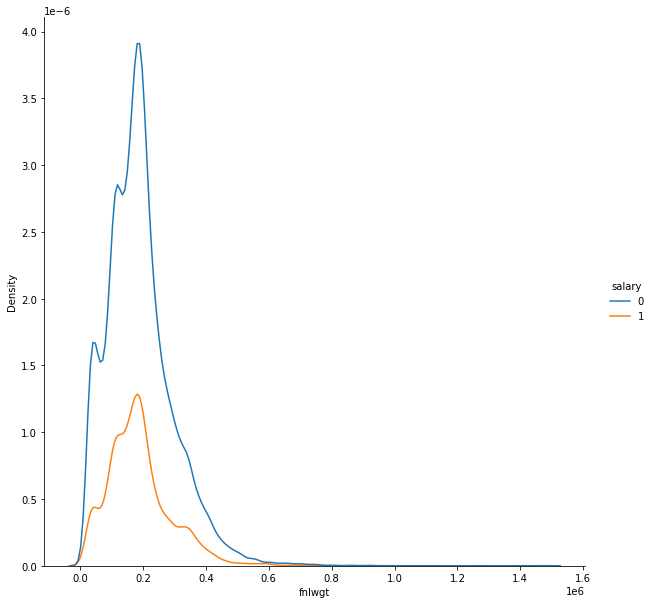

In [37]:
sns.displot(data=df, x="fnlwgt", hue="salary", kind="kde", height=8.5, aspect=1)

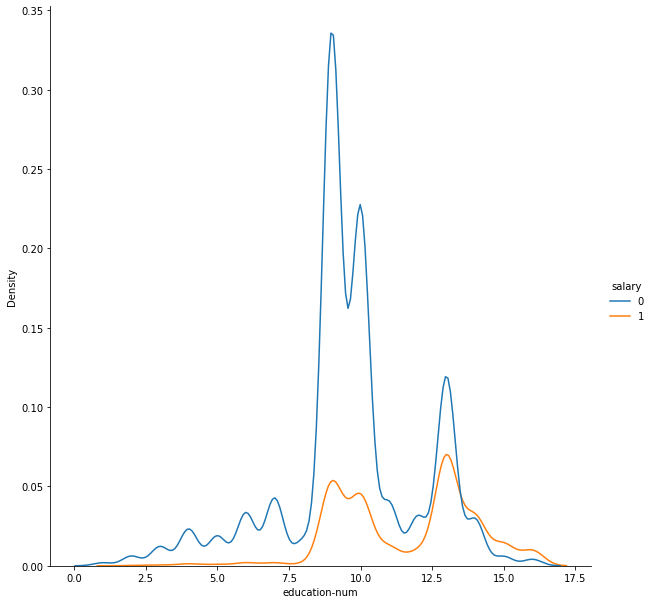

In [38]:
sns.displot(data=df, x="education-num", hue="salary", kind="kde", height=8.5, aspect=1)

<AxesSubplot:xlabel='salary', ylabel='education-num'>

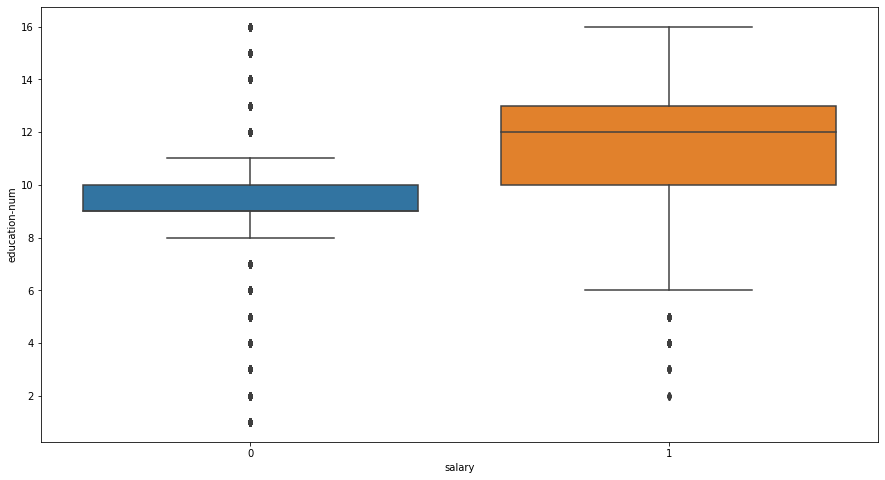

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, y="education-num", x="salary")

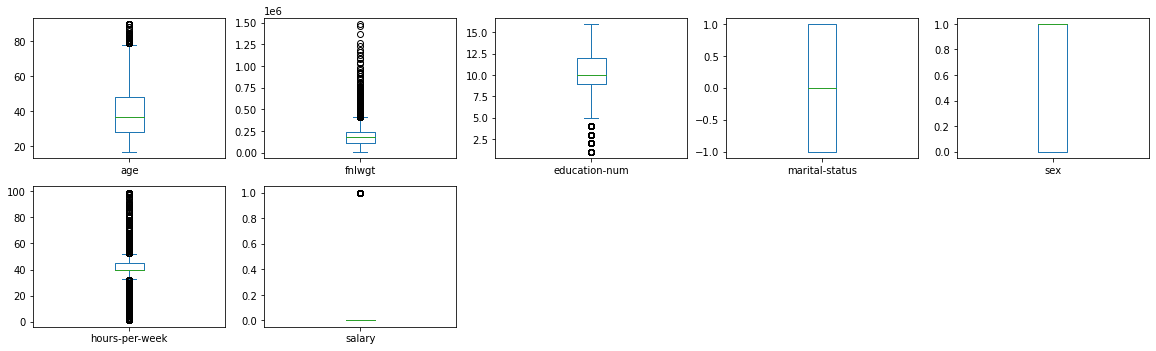

In [40]:
#check outliers
df.plot(kind = "box" , subplots = True , figsize = (20,15) ,  layout = (5,5))
plt.show()

<AxesSubplot:ylabel='age'>

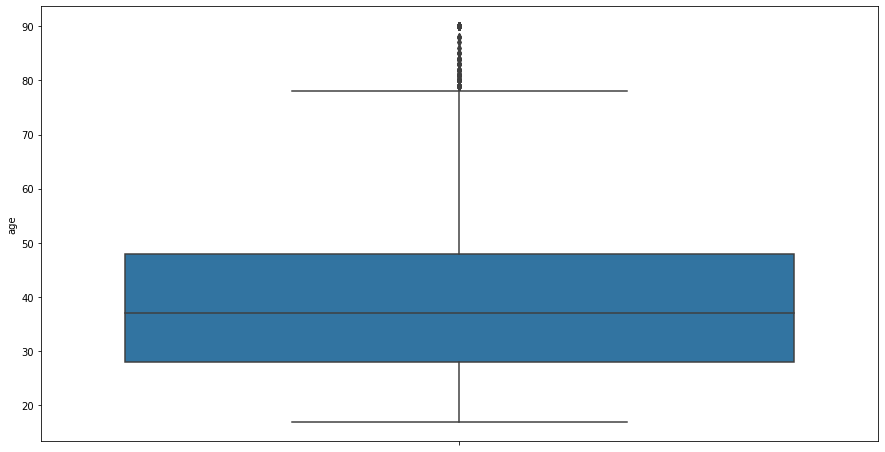

In [41]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df, y="age")

In [42]:
outAge = df[df['age'] > 61]
outAge.shape #get number of rows with outliers (Q3 + 1.5(Q3 - Q1))

(2031, 13)

In [43]:
df.drop(outAge.index, inplace = True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


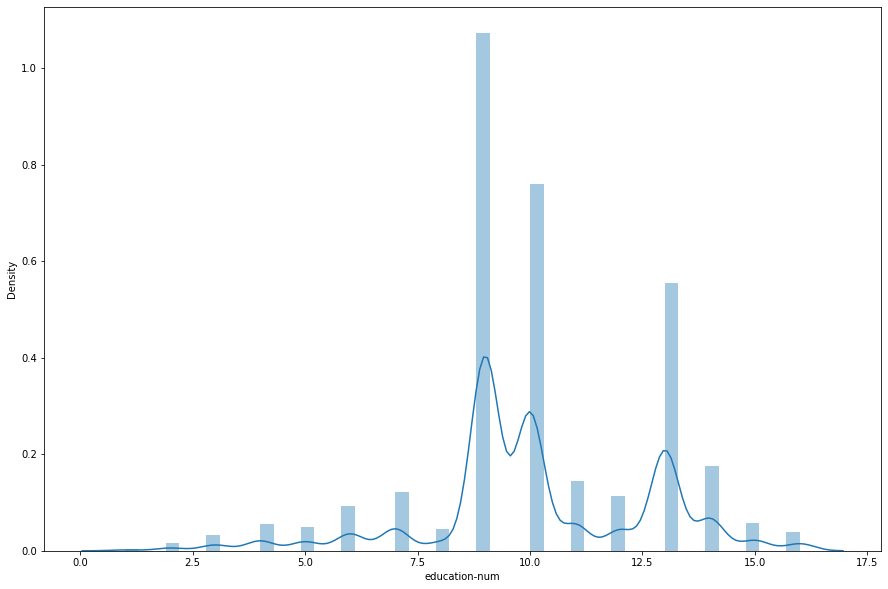

In [44]:
plt.figure(figsize=(15,10))
sns.distplot(df['education-num'])
plt.show()

In [45]:
outEdu = df[df['education-num'] < 3.5]
outEdu.shape #get number of rows with outliers (Q1 - 1.5(Q3 - Q1))

(474, 13)

In [46]:
df.drop(outEdu.index, inplace = True)

In [47]:
# Formating [ education-num ] column
df['education-num'] =  df['education-num'].replace(range(1,9) , 0) #Compulsory (Preschool:Grade12)
df['education-num'] =  df['education-num'].replace(9 , 1) #Highschool-Graduate
df['education-num'] =  df['education-num'].replace([10,13],2) #Bachelor or SomeCollege
df['education-num'] =  df['education-num'].replace([11,12],3) #Assoc-voc or Assoc-acdm
df['education-num'] =  df['education-num'].replace(13,4) #Masters
df['education-num'] =  df['education-num'].replace(14,5) #Prof-school
df['education-num'] =  df['education-num'].replace(15,6) #Doctrate

In [48]:
df['education-num'].value_counts()

2     12041
1      9819
0      3326
3      2354
5      1614
6       521
16      357
Name: education-num, dtype: int64

In [49]:
le = LabelEncoder()

In [50]:
for i in df.columns:
    if (df[i].dtypes== 'object') :
        df[i] = le.fit_transform(df[i])

In [51]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [52]:
smote=SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
import plotly.express as px
fig = px.pie(values=y_resampled.value_counts(), width=800, height=400, title="Data Balance")
fig.show()

# Modeling

# Random Forest Classifier

In [54]:
clf = RandomForestClassifier()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2,random_state=44 )

In [56]:
model = clf.fit(X_train, y_train)

In [57]:
y_pred = model.predict(X_test)

In [58]:
print("Accuracy on Test Data : {:,.2f}".format(clf.score(X_test , y_test) *100 ) , '%')

Accuracy on Test Data : 87.54 %


In [59]:
print(accuracy_score(y_pred, y_test))

0.8753859726510808


In [60]:
confusion_matrix(y_test ,y_pred)

array([[3895,  551],
       [ 579, 4043]])

In [61]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      4446
           1       0.88      0.87      0.88      4622

    accuracy                           0.88      9068
   macro avg       0.88      0.88      0.88      9068
weighted avg       0.88      0.88      0.88      9068



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



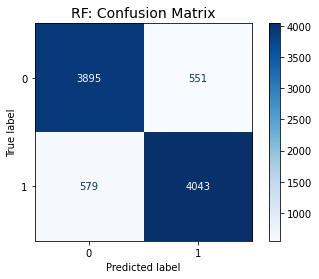

In [62]:
plot_confusion_matrix(model, X_test, y_test,cmap='Blues')
plt.title('RF: Confusion Matrix', fontsize=14)
plt.show()

# KNN Model

In [63]:
KNN=KNeighborsClassifier()

In [64]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
KNN.score(X_train,y_train)

0.7951863696515218

In [66]:
KNN.score(X_test,y_test)

0.6864799294221438

In [67]:
y_pred_knn = KNN.predict(X_test)

In [68]:
cm2 = confusion_matrix(y_test, y_pred_knn)
print(cm2)

[[2709 1737]
 [1106 3516]]


In [69]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66      4446
           1       0.67      0.76      0.71      4622

    accuracy                           0.69      9068
   macro avg       0.69      0.69      0.68      9068
weighted avg       0.69      0.69      0.68      9068



# Logistic Regression

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x = df.drop("salary", axis = 1).values
y = df['salary'].values 

In [72]:
x_train,x_test ,y_train,y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [73]:
x_train.shape

(22524, 12)

In [74]:
lr = LogisticRegression()

In [75]:
lr.fit(x_train , y_train)

LogisticRegression()

In [76]:
lr.score(x_train , y_train)

0.7551944592434736

In [77]:
lr.score(x_test , y_test)

0.753862546616942

In [78]:
y_pred = lr.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data

,Y_test,Y_pred
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7503,0,0
7504,0,0
7505,0,0
7506,0,0


# Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB


In [80]:
model = GaussianNB()


In [81]:
x_train,x_test ,y_train,y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [82]:
model.fit(x_train , y_train)


GaussianNB()

In [83]:
model.score(x_train , y_train)

0.7793908719587995

In [84]:
model.score(x_test , y_test)

0.7818327117741076

In [85]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
y_pred = model.predict(x_test)
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : y_pred})
data

,Y_test,Y_pred
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
7503,0,0
7504,0,0
7505,0,0
7506,0,0


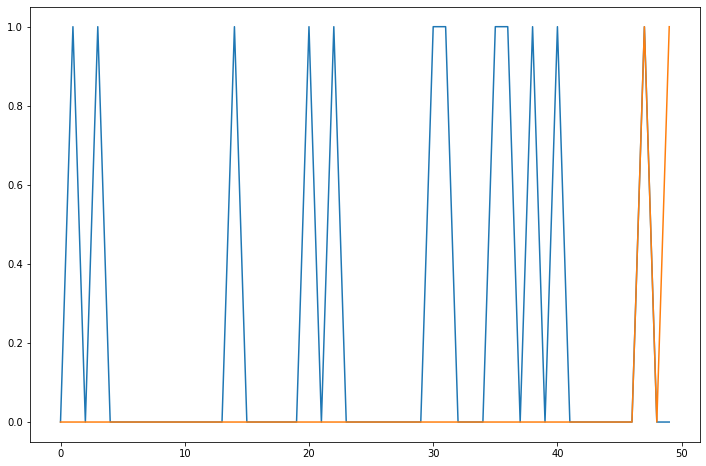

In [87]:
plt.figure(figsize=(12,8))
plt.plot(data[:50])

In [88]:
models = ['Random Forest' , 'KNN' , 'Logistic Regression' 'Naive Bayes']
data = [[RF_score], [KNN_score],[LR_score], [NB_score]]
cols = ['Accuracy']
pd.DataFrame(data=data , index = models , columns = cols).sort_values(ascending=False , by = ['Accuracy'])

NameError: name 'RF_score' is not defined